In [1]:
import numpy as np
import sympy as sp
from scipy.integrate import odeint
from sympy.physics.quantum.constants import hbar

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import animation
mpl.rcParams['animation.ffmpeg_path'] = 'C:\\ffmpeg-static\\ffmpeg-20160919-11777eb-win64-static\\bin\\ffmpeg.exe'

In [4]:


a, m, om = sp.symbols('a m omega', real=True, positive = True)


def rhs(f, t):
    z = f[0]
    vz = f[1]
    vzp = -z
    return np.array((vz, vzp)) 


def rkint(f0, t0, h):
    k1 = rhs(f0, t0)
    f1 = f0 + k1 * h / 2
    k2 = rhs(f1, t0+h/2)
    f2 = f0 + k2 * h / 2
    k3 = rhs(f2, t0+h/2)
    f3 = f0 + k3 * h
    k4 = rhs(f3, t0+h)
    m = k4/6 + k3/3 + k2/3 + k1/6
    return f0 + m*h

In [5]:
step = 300
tmax = 20*np.pi/3
tt = np.linspace(0.0, tmax, step)


In [6]:
x = np.linspace(-np.pi, np.pi, 256)
y = np.linspace(-np.pi, np.pi, 256)

xx, yy = np.meshgrid(x,y)
z0 = np.sin(xx)*np.cos(yy)
init = np.array((z0, np.zeros_like(z0)))

result = [init]
h = tmax / (step - 1)
for tval in tt:
    result.append(rkint(result[-1], tval, h))
result = np.array(result)

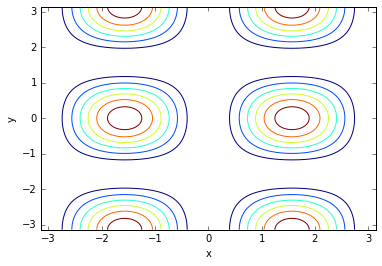

In [7]:
xx, yy = np.meshgrid(x,y)
z0 = np.sin(xx)*np.cos(yy)

plt.contour(xx, yy, z0*result[0,0])
plt.ylabel('y')
plt.xlabel('x')

    

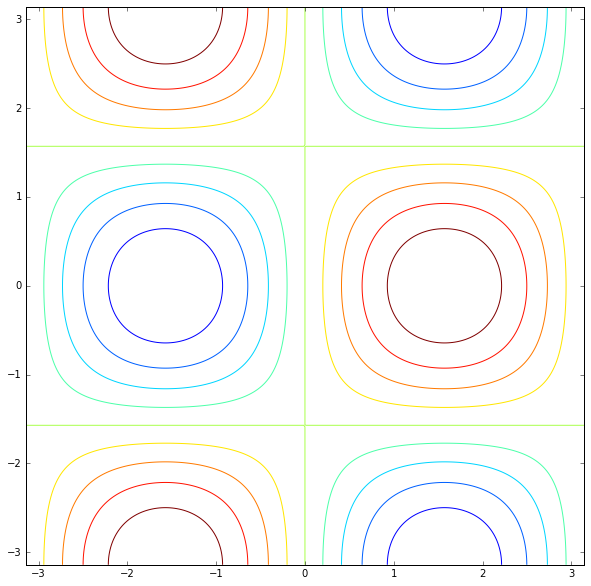

In [8]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()  
plt.xlabel('x')
plt.ylabel('y')

levels = np.linspace(-1, 1, 10, endpoint=False)

def animatex(i):
    ax.clear()
    return plt.contour(xx, yy, result[i, 0], levels)
def animatev(i):
    ax.clear()
    return plt.contour(xx, yy, result[i, 1], levels)

anim = animation.FuncAnimation(fig, animatex, frames=len(tt), blit=False)
mywriter = animation.FFMpegWriter()

anim.save("position.mp4", writer=mywriter)
    

1. complicated diff eq
2. complex numbers
3. adaptive step sizes
4. 2d array: fuction (x,y,t)+++++++++